**Advanced Astroinformatics (Semester 1 2024)**

# Plotting TESS light curves

**Advanced Astroinformatics Student Project**

*N. Hernitschek*



---
## Contents
* [Loading light curves](#first-bullet)
* [Plotting light curves](#second-bullet)
* [Plotting light curves in bulk](#third-bullet)
* [Summary](#fourth-bullet)


## 1. Loading Light Curves <a class="anchor" id="second-bullet"></a>

The github repository contains a file `data.zip` (check on the right side of the repository website, `Releases`). Download it and extract it. It should expand to about 600 MB.

You will find the following subfolders:

`_TESS_lightcurves_raw`

`_TESS_lightcurves_median_after_detrended` 

`_TESS_lightcurves_outliercleaned`


and a file `info_tess_data.txt`.


Please open the file `info_tess_data.txt` and a light curve file from any of the folders to familiarize yourself with the data.

## 2. Plotting Light Curves <a class="anchor" id="second-bullet"></a>

The next step is to make plots of those light curves.

We begin with just one light curve.


First, load the light curve:

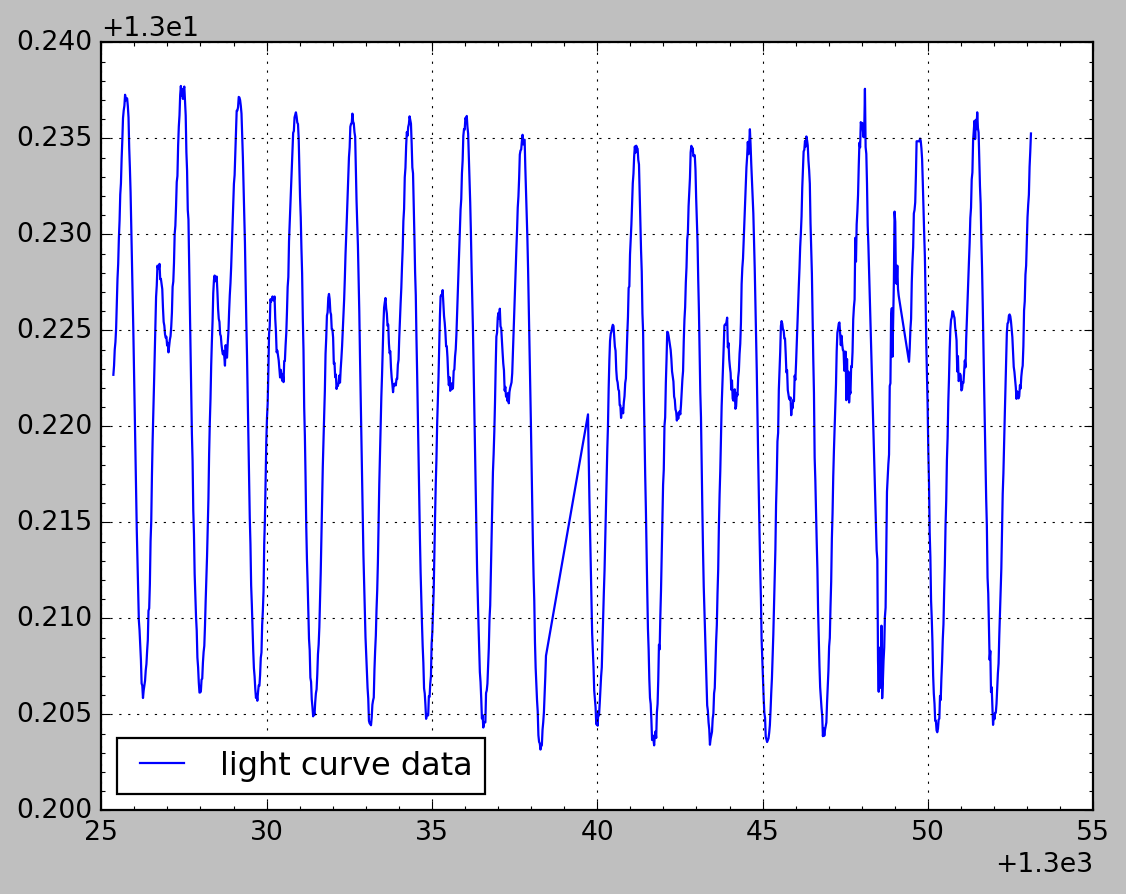

In [12]:


%matplotlib inline
%config InlineBackend.figure_format='retina' # very useful command for high-res images

# invoke pyplot in matplotlib, give it an alias
import matplotlib.pyplot as plt 

import numpy as np
from concurrent.futures import as_completed

import math
import glob
import sys
import os

#import matplotlib
#matplotlib.use('PDF')
#import matplotlib.pyplot as plt 

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')


import pandas as pd
file_path = '/home/user/DAA11/_TESS_lightcurves_outliercleaned/ACV/'


data_in = pd.read_csv(file_path+"41259805_sector01_4_2_cleaned.lc",delim_whitespace=False,
names = ['time', 'mag', 'magerr'])


tess_lc = data_in.to_records(index=False)

plt.plot(tess_lc['time'], tess_lc['mag'], label=r'light curve data')

plt.grid(which='major')
plt.legend(loc='lower left');

## optional extras
plt.minorticks_on()
plt.tick_params(which='both', direction='in', tick2On=True)


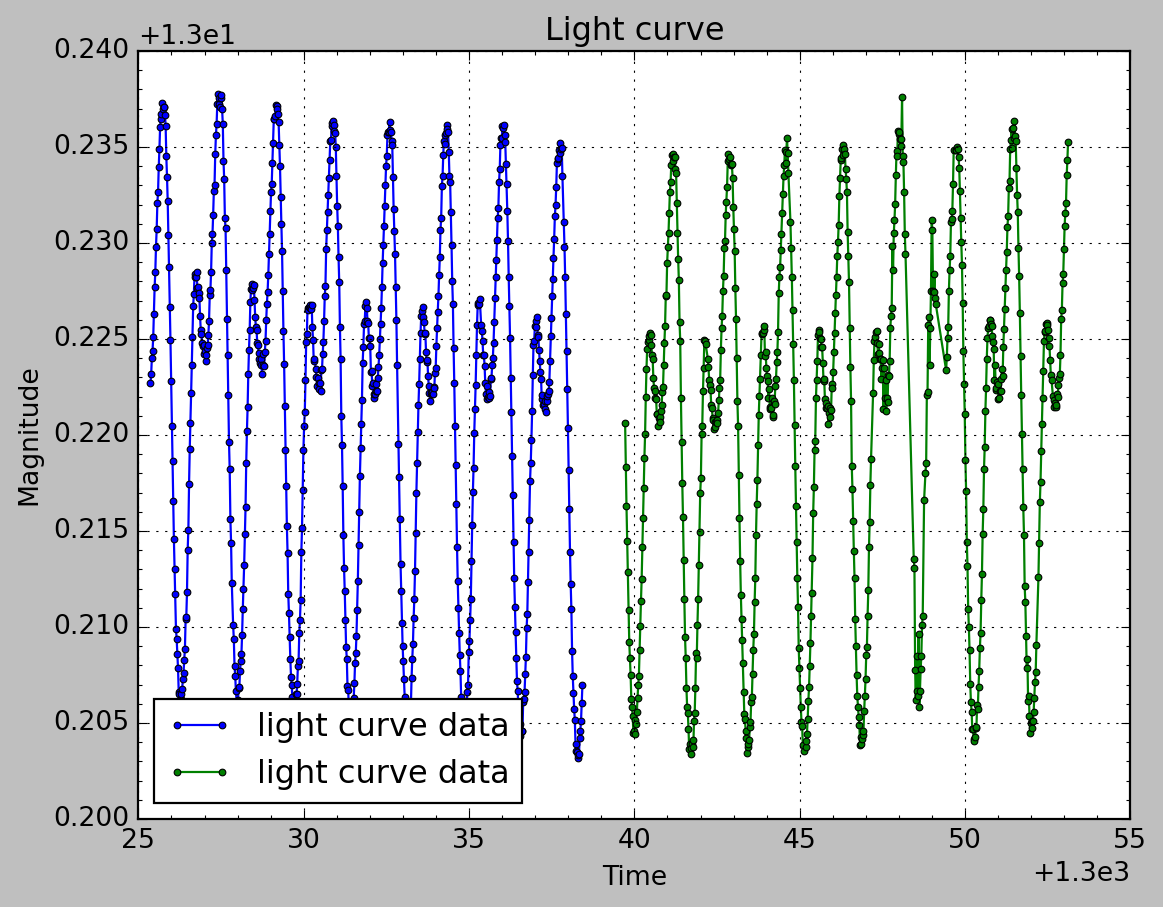

In [13]:
import matplotlib.pyplot as plt 
import pandas as pd

file_path = '/home/user/DAA11/_TESS_lightcurves_outliercleaned/ACV/'

data_in = pd.read_csv(file_path + "41259805_sector01_4_2_cleaned.lc", delim_whitespace=False,
                      names=['time', 'mag', 'magerr'])

tess_lc = data_in.to_records(index=False)

discontinuous_indices = []  # Indices where the points are discontinuous

# Identify discontinuous points
for i in range(len(tess_lc) - 1):
    if tess_lc['time'][i + 1] - tess_lc['time'][i] > 1:  # Threshold
        discontinuous_indices.append(i)

# Plot 
start_idx = 0
for end_idx in discontinuous_indices:
    plt.plot(tess_lc['time'][start_idx:end_idx], tess_lc['mag'][start_idx:end_idx], marker='o', 
             label=r'light curve data', markersize=3)  # Size of the points
    start_idx = end_idx + 1

# Plot the remaining points
plt.plot(tess_lc['time'][start_idx:], tess_lc['mag'][start_idx:], marker='o', 
         label=r'light curve data', markersize=3)  # Size

plt.xlabel('Time')  # Label for x-axis
plt.ylabel('Magnitude')  # Label for y-axis
plt.title('Light curve') #Title

plt.grid(which='major')
plt.legend(loc='lower left')

## optional extras
plt.minorticks_on()
plt.tick_params(which='both', direction='in', tick2On=True)

plt.show()


other ways to read in data: `numpy.loadtxt`

We chose here `pandas` as it will enable us to do a few things more when reading in tables (you will see this later on).

In [14]:
print(data_in)

             time        mag    magerr
0     1325.365967  13.222690  0.004788
1     1325.386719  13.223169  0.004790
2     1325.407593  13.224006  0.004793
3     1325.428467  13.224393  0.004793
4     1325.449219  13.225105  0.004798
5     1325.470093  13.226322  0.004804
6     1325.490967  13.227690  0.004808
7     1325.511719  13.228467  0.004810
8     1325.532593  13.229805  0.004817
9     1325.553467  13.230708  0.004820
10    1325.574219  13.232078  0.004826
11    1325.595093  13.232666  0.004828
12    1325.615967  13.233955  0.004834
13    1325.636719  13.234904  0.004836
14    1325.657593  13.236059  0.004842
15    1325.678467  13.236458  0.004843
16    1325.699219  13.236700  0.004847
17    1325.720093  13.237275  0.004848
18    1325.740967  13.236985  0.004848
19    1325.761719  13.237109  0.004848
20    1325.782593  13.237081  0.004847
21    1325.803467  13.236683  0.004844
22    1325.824219  13.236095  0.004839
23    1325.845093  13.234506  0.004835
24    1325.865967  13.233

We now plot this light curve using `matplotlib`.

**Try to figure it out on your own first!**


## 3. Plotting Light Curves in Bulk <a class="anchor" id="third-bullet"></a>


The light curves are organized in folders corresponding to the
VARIABLE STAR TYPE DESIGNATIONS IN VSX:

https://www.aavso.org/vsx/index.php?view=about.vartypes


Modify the plotting code so it plots:
    a) all light curves in a given folder
    b) all light curves in all folders.
    
Hints:
- save the light curves as `*.pdf` files
- give them meaningful file names
- after plotting a few files successfully, you will encounter an error message. Why does this happen?

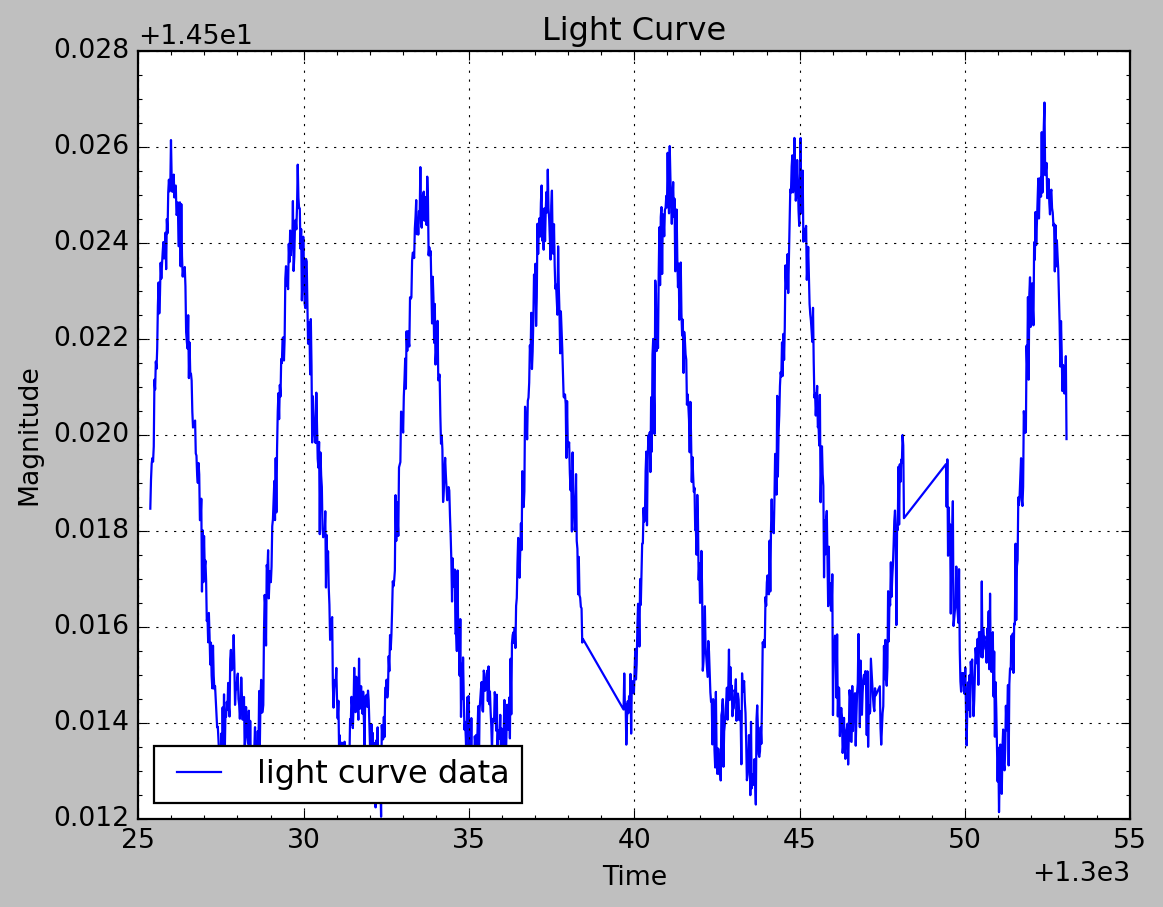

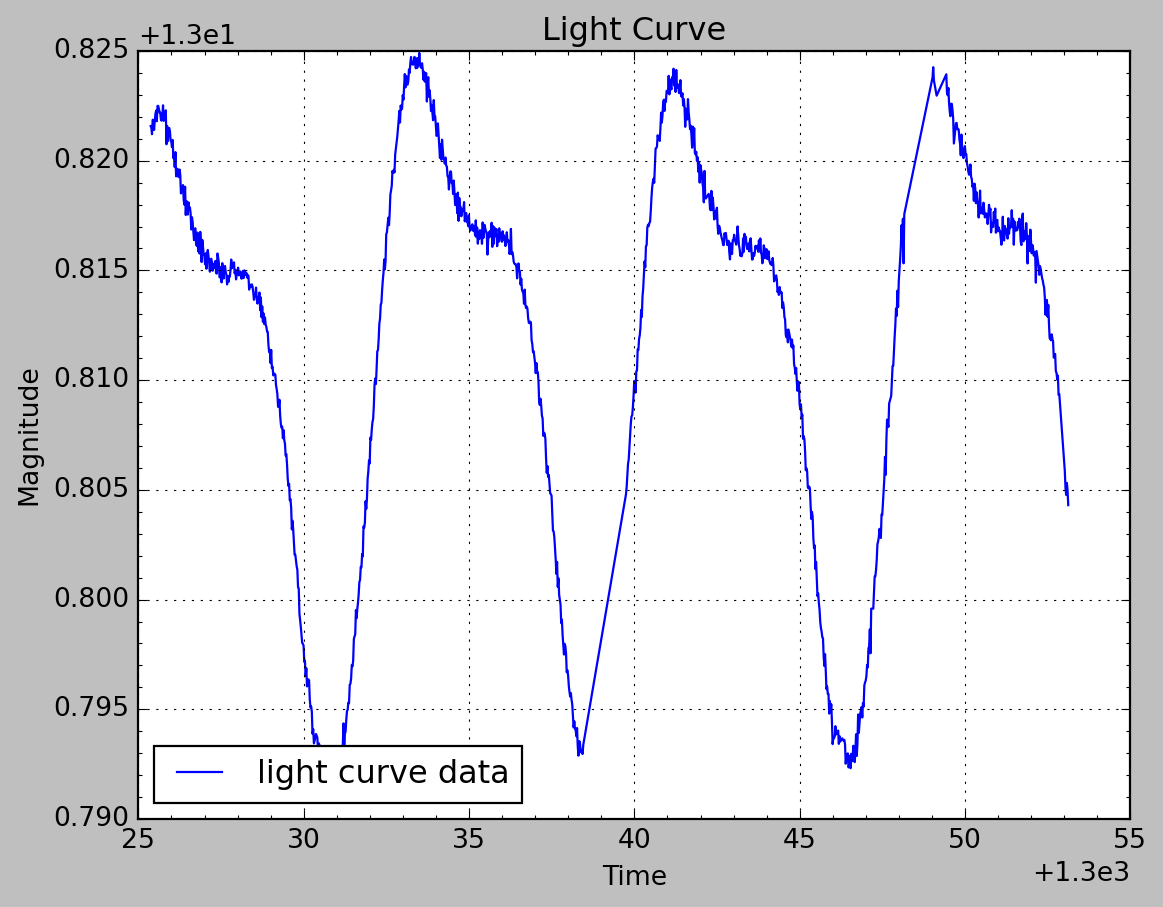

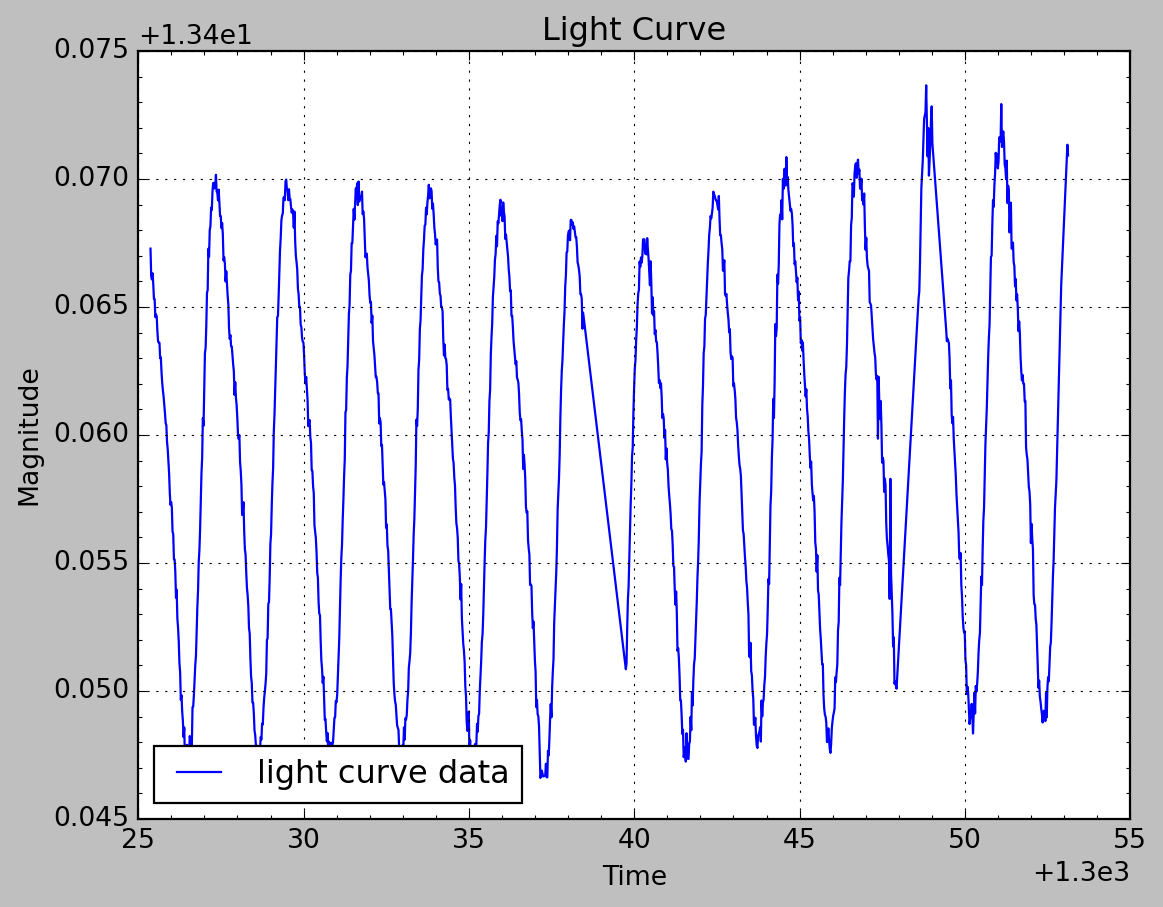

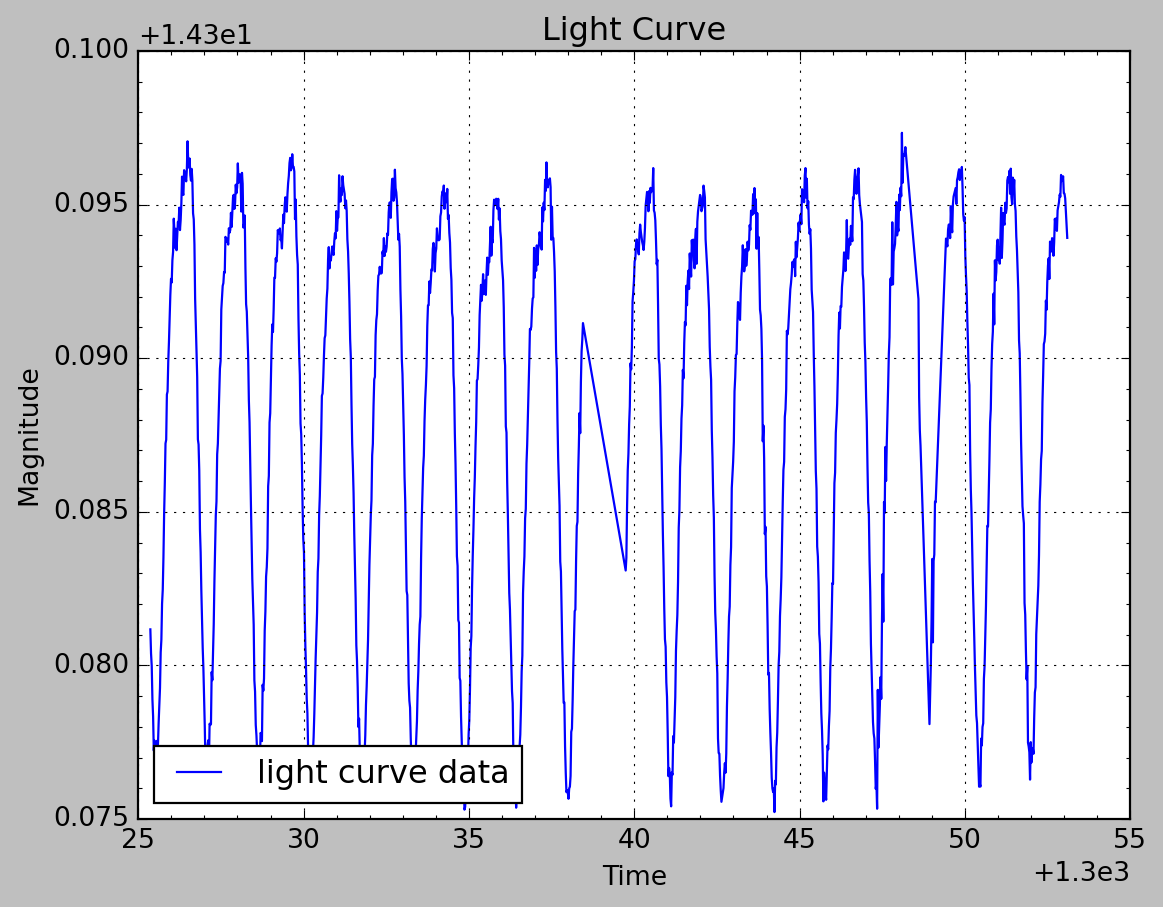

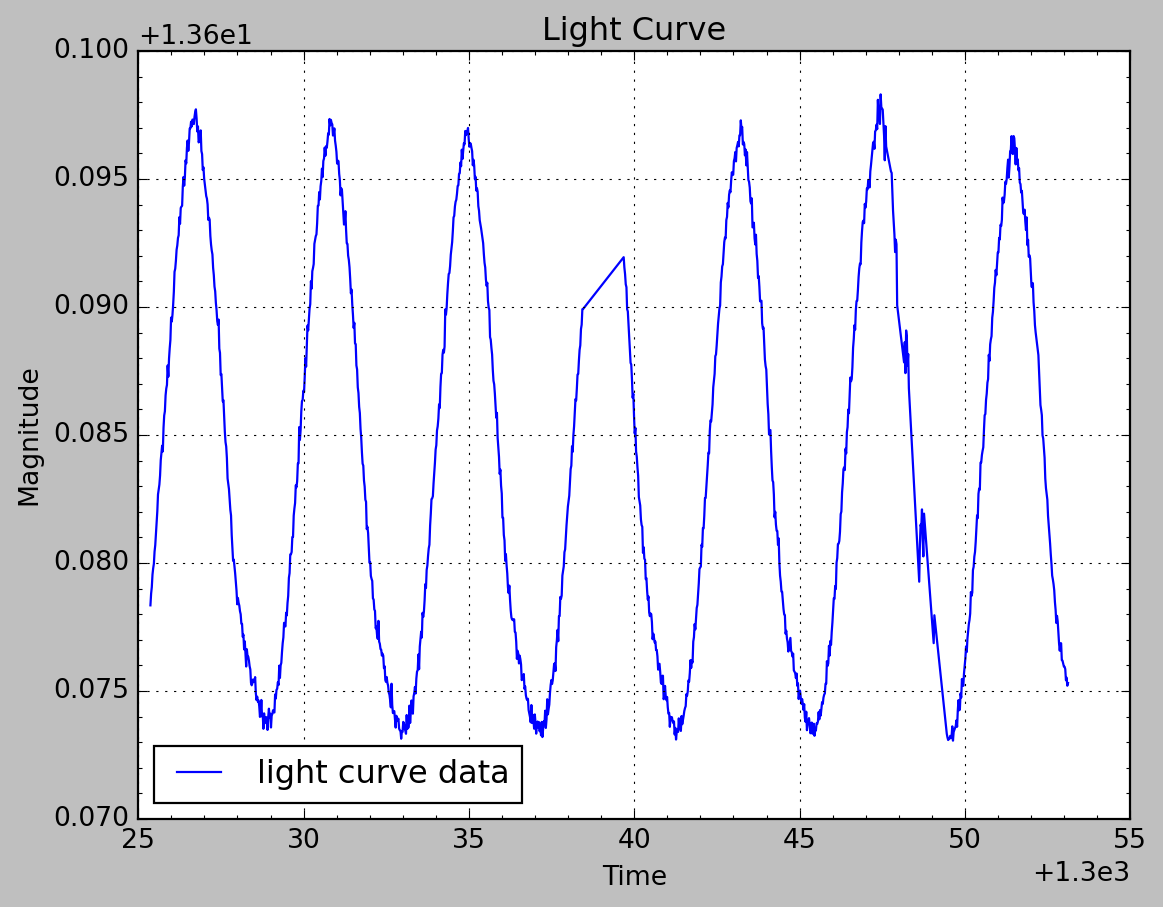

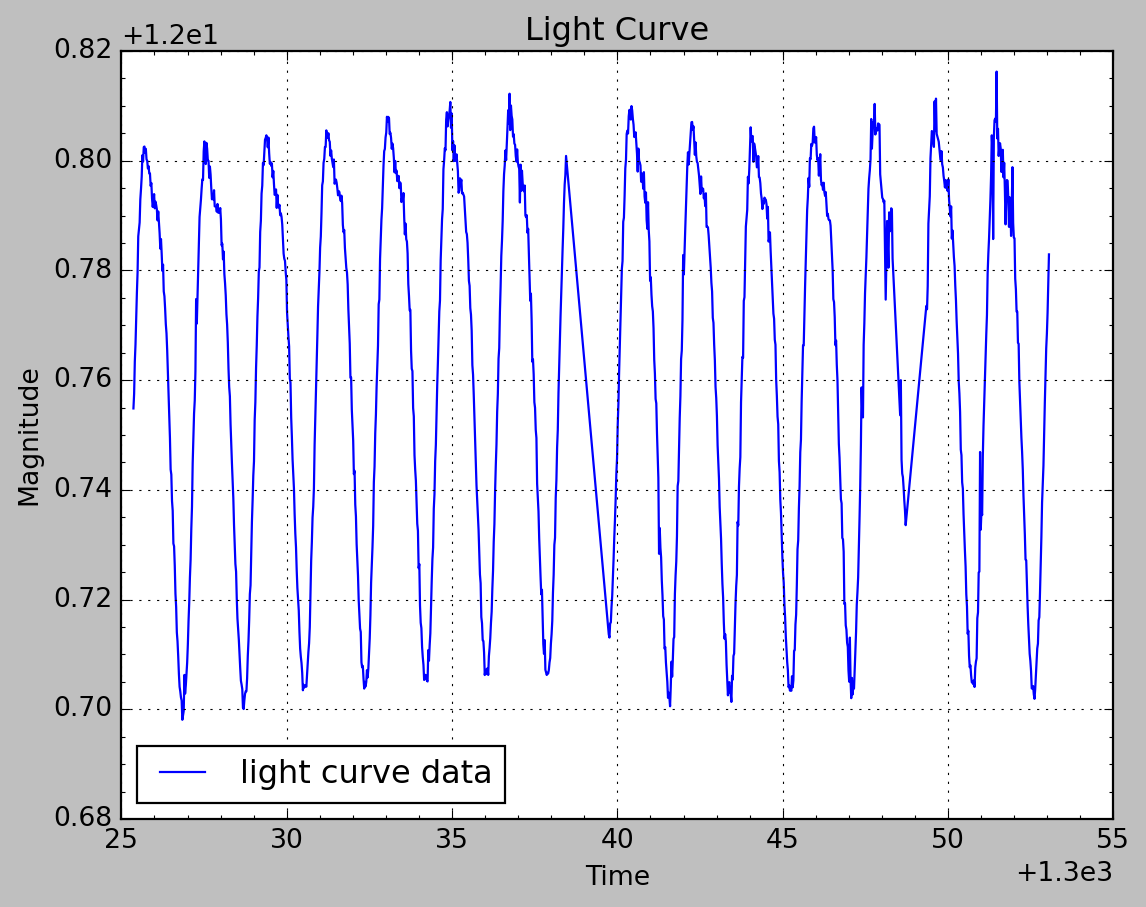

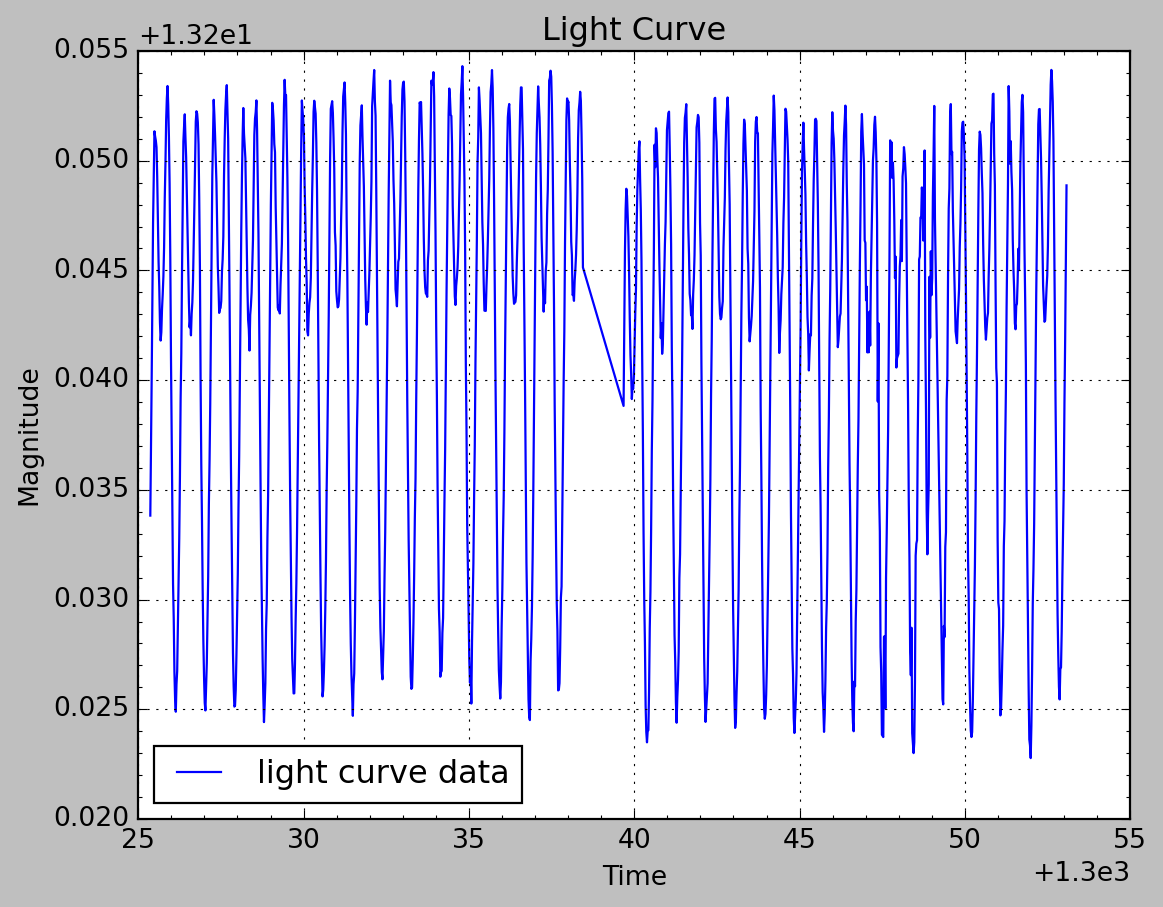

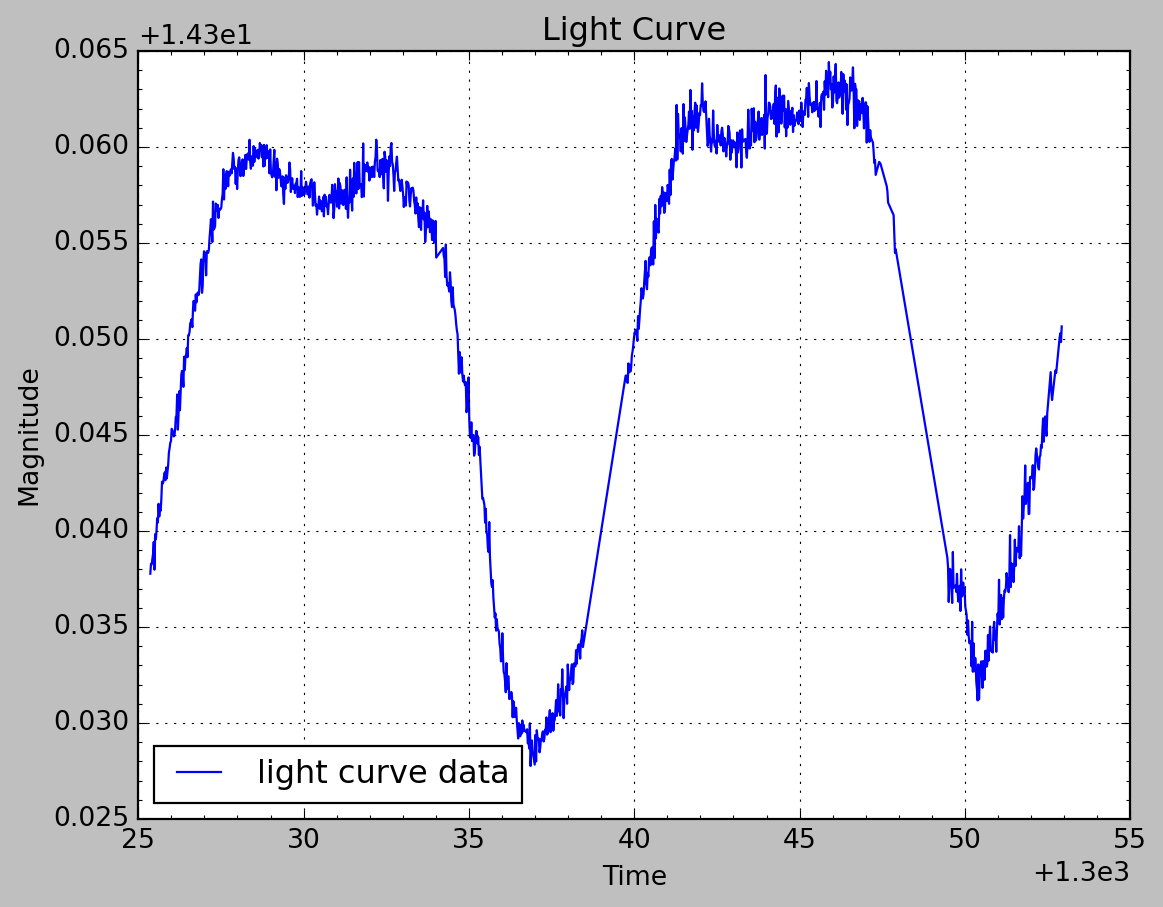

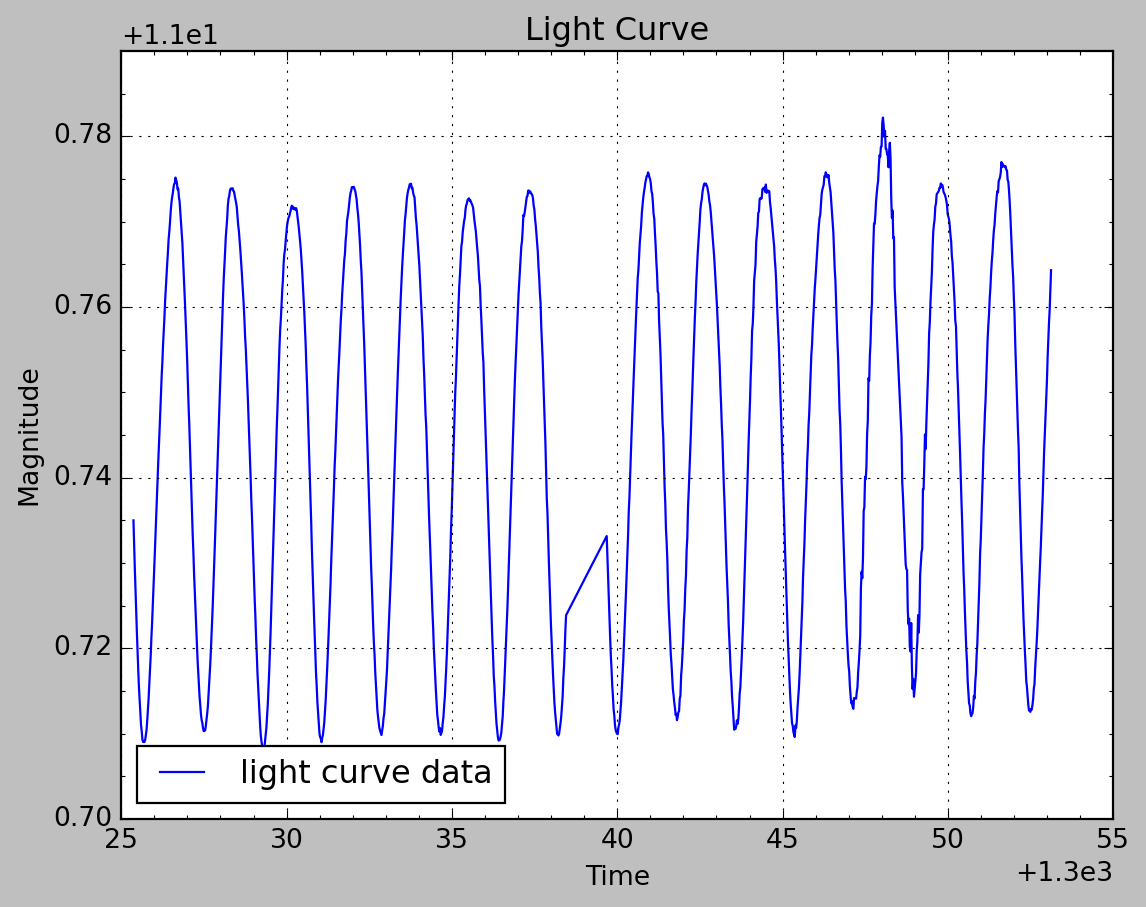

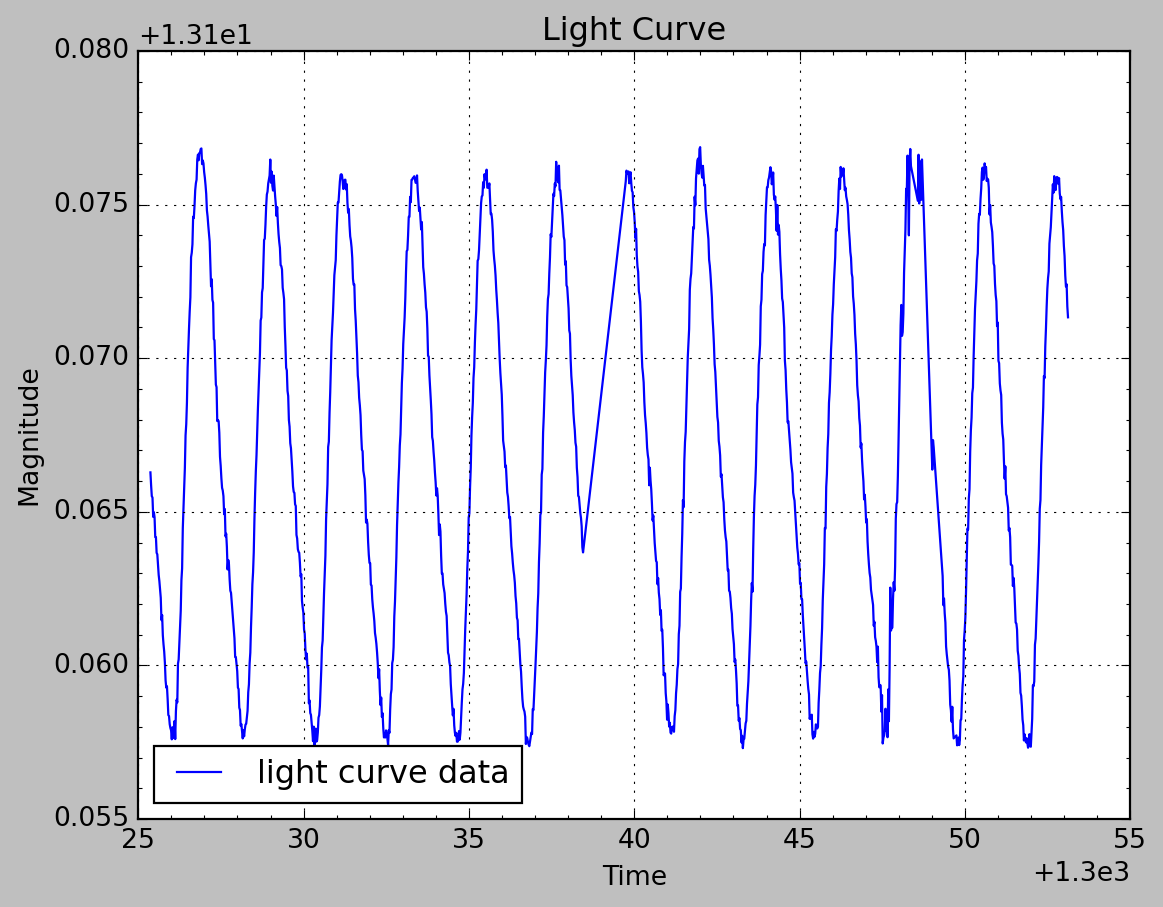

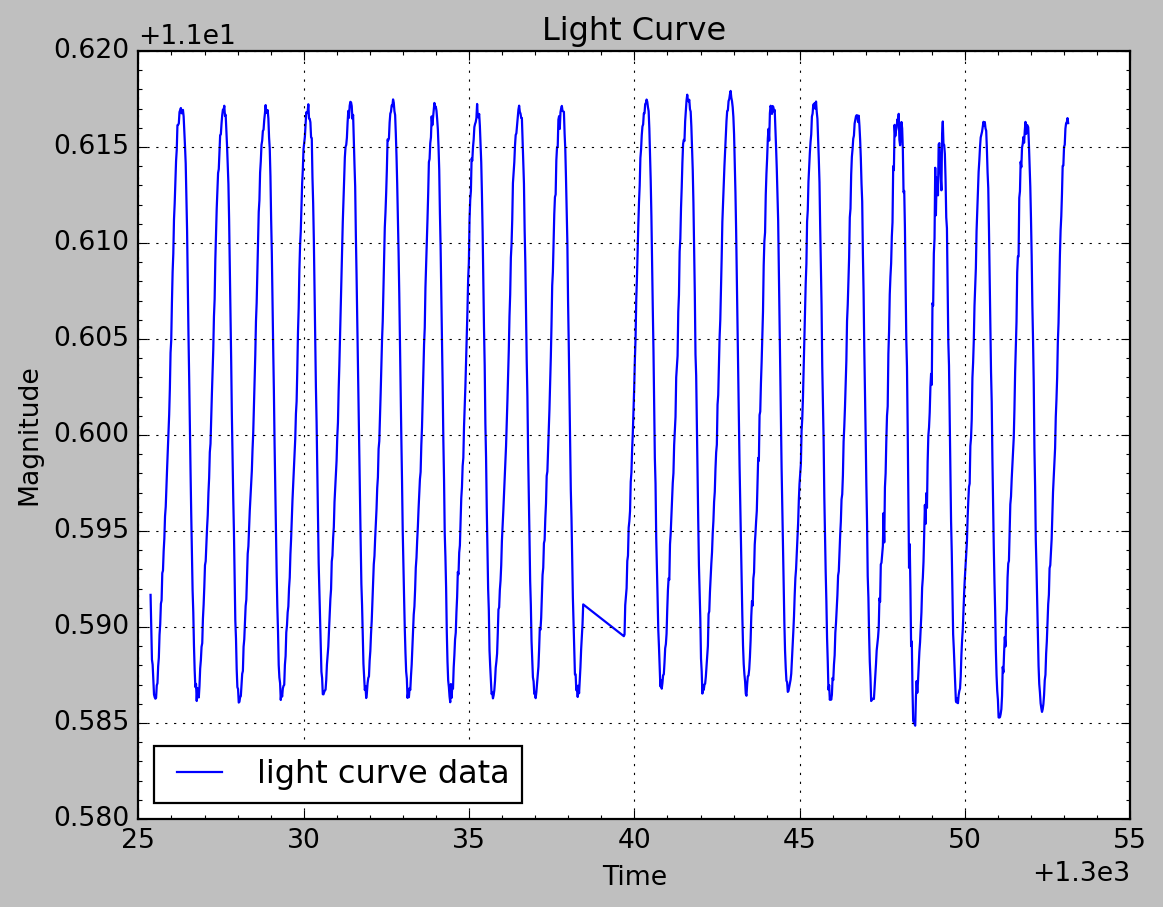

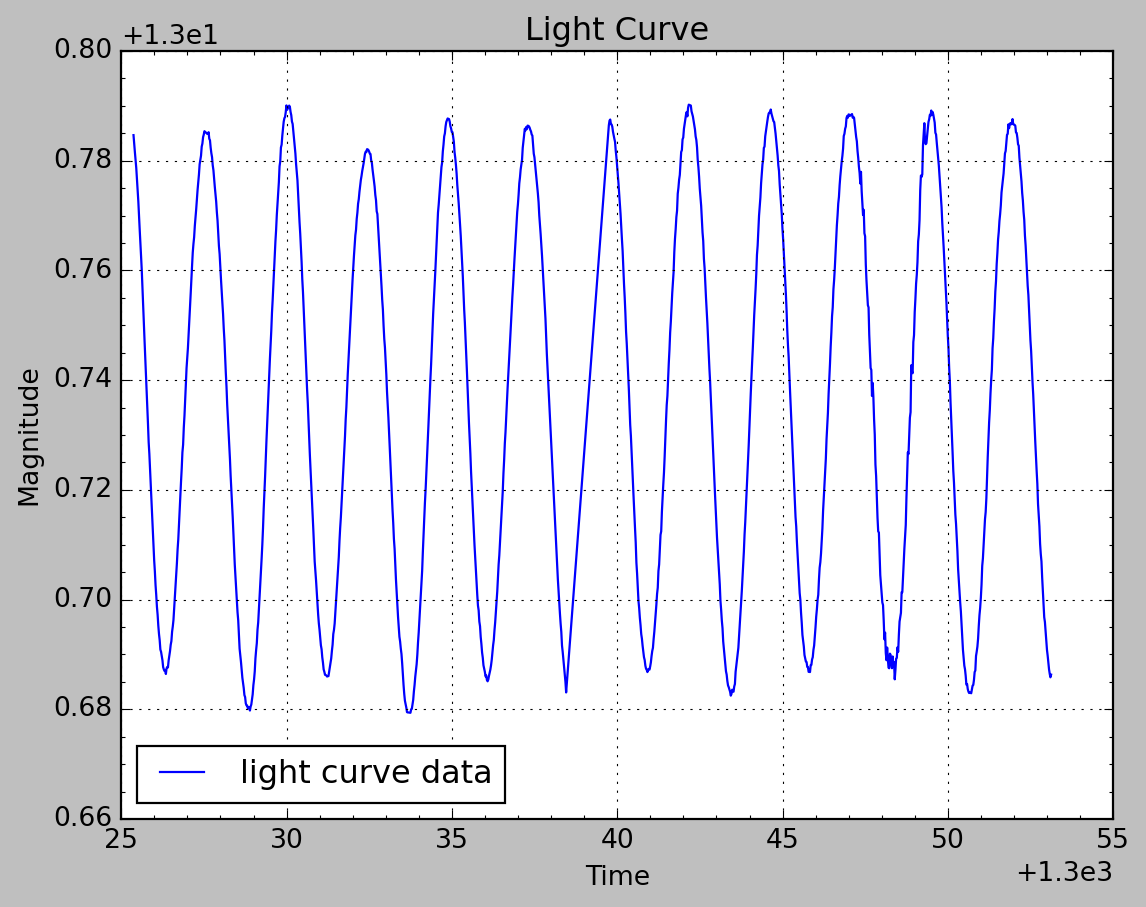

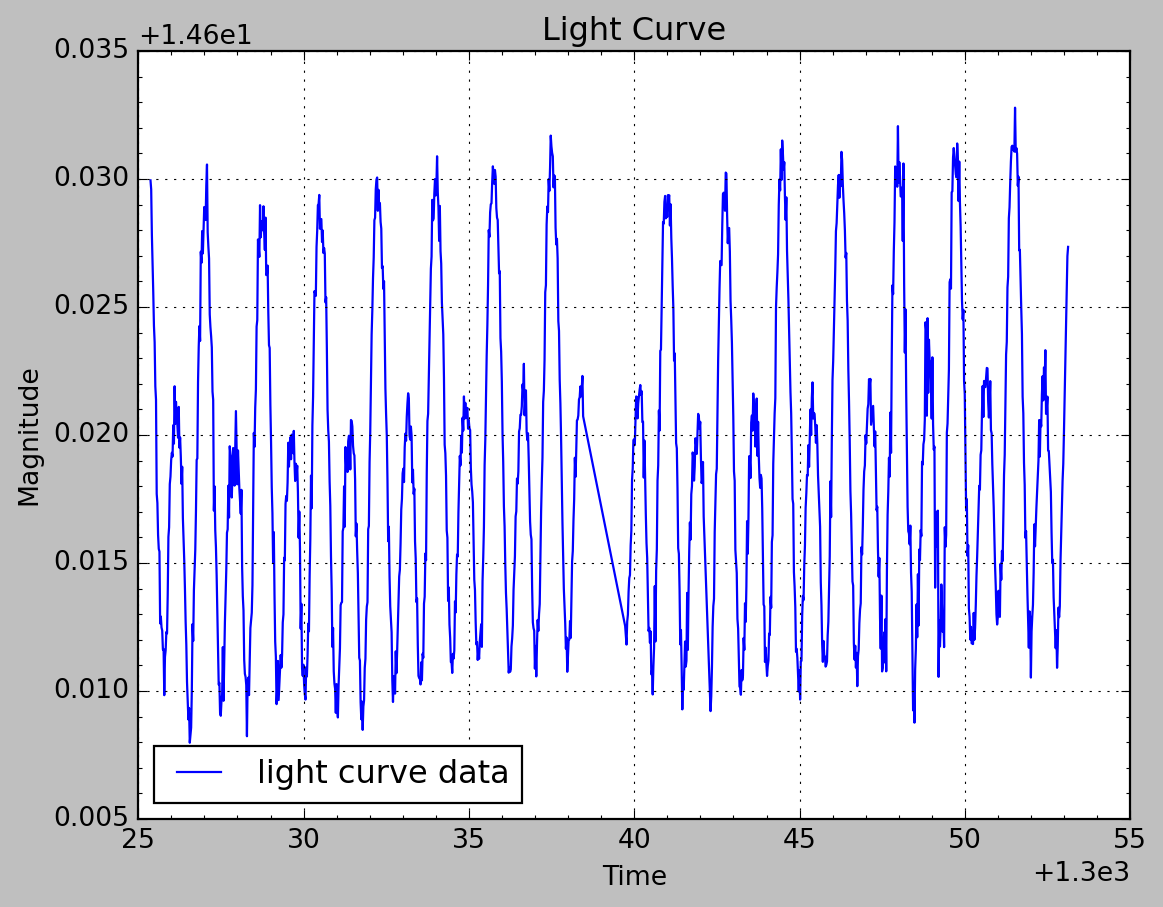

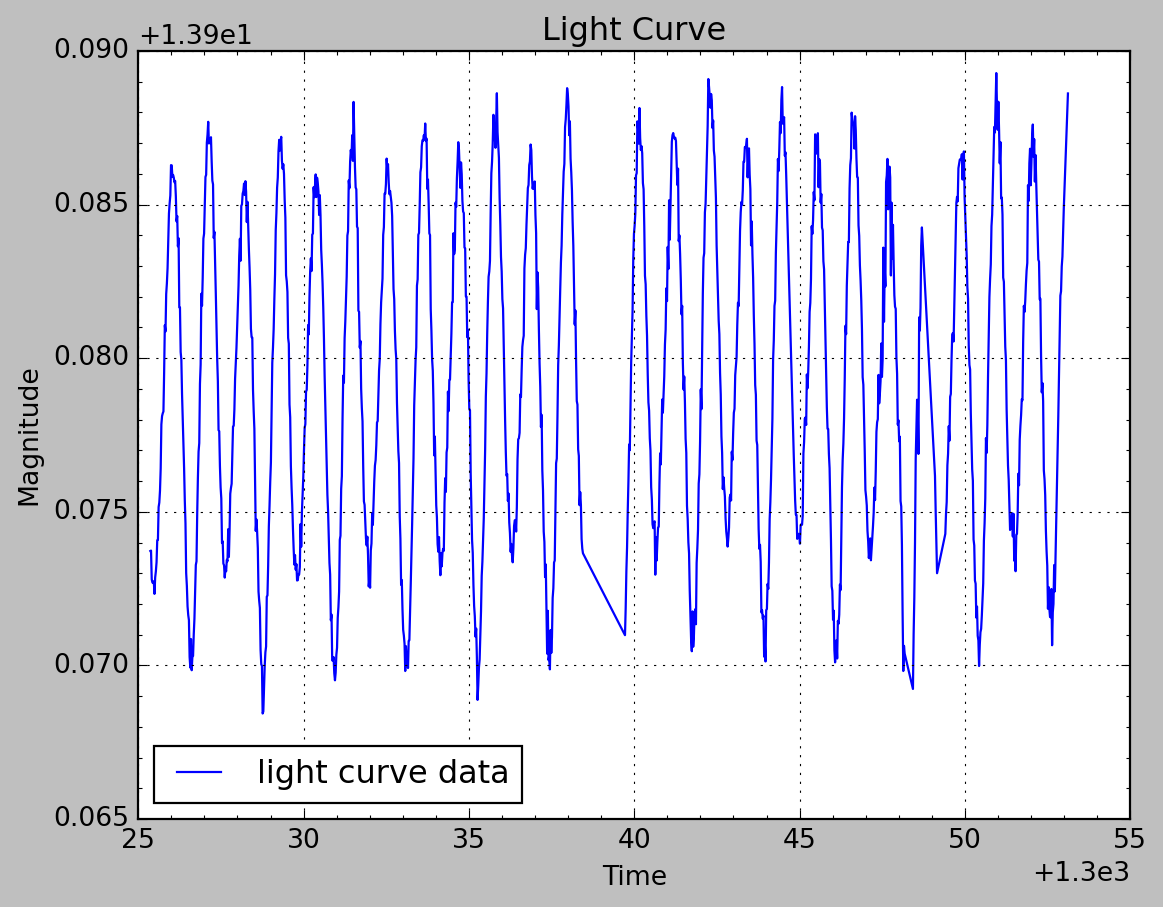

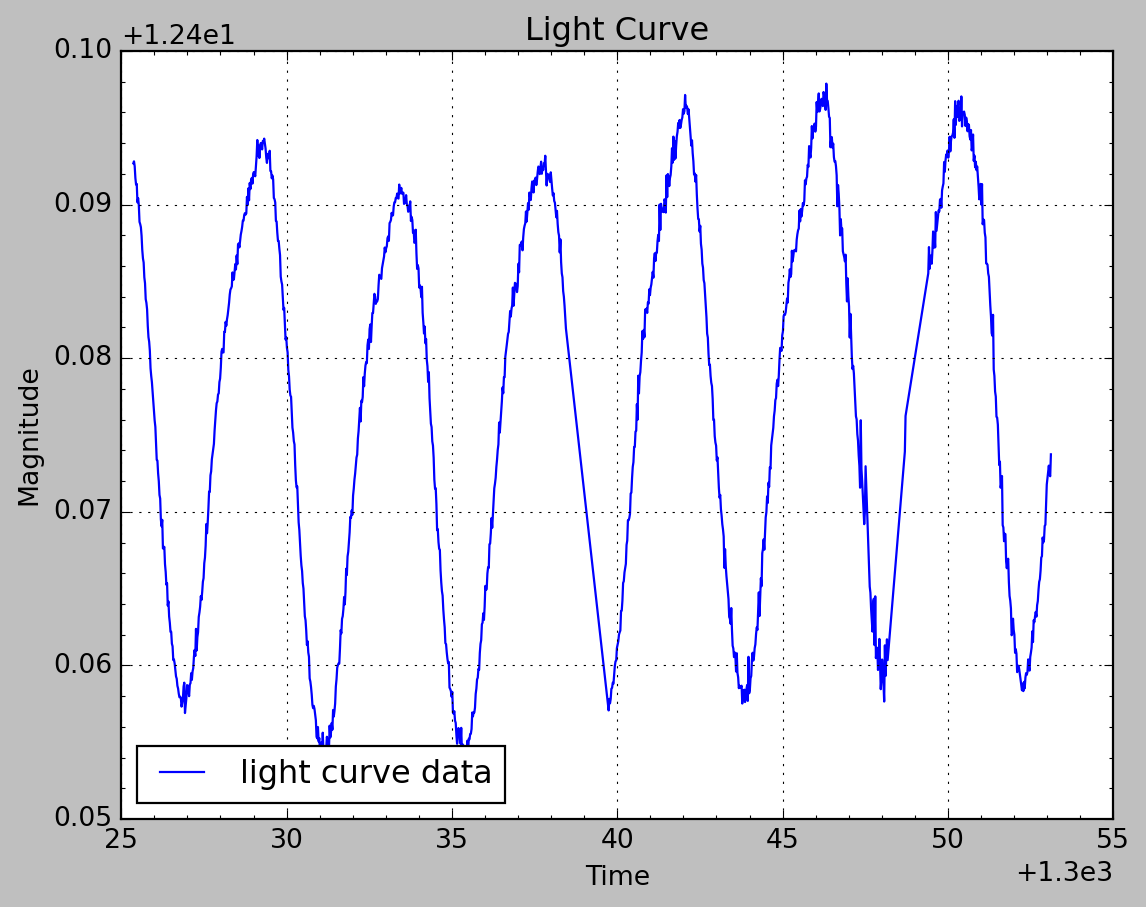

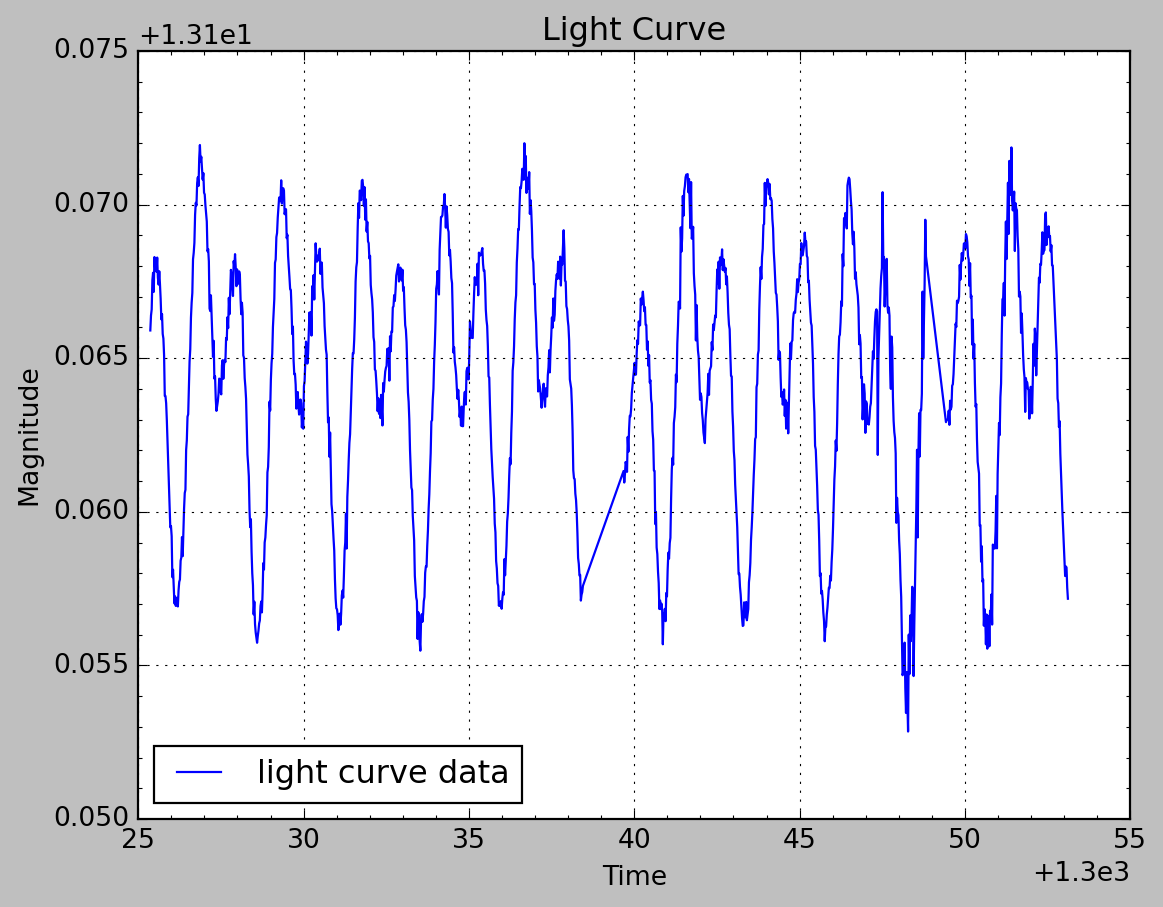

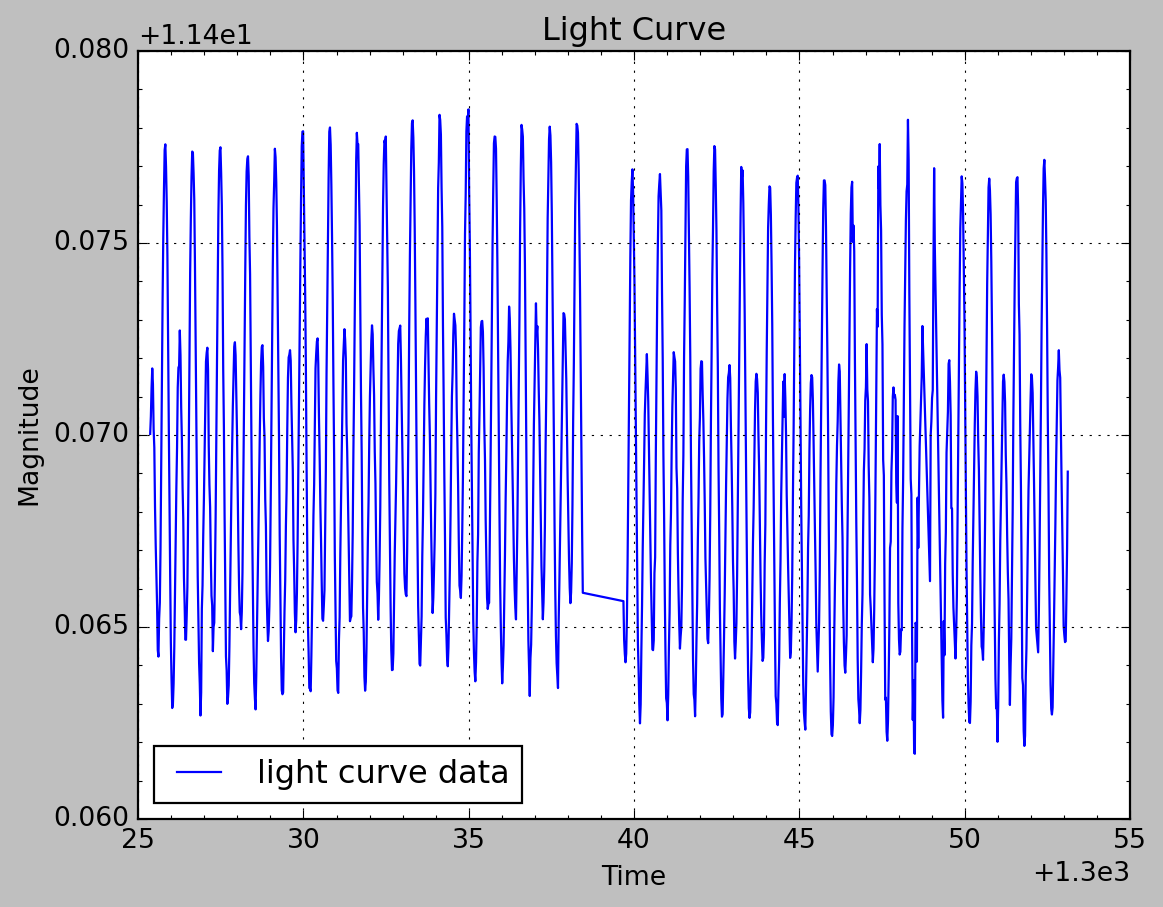

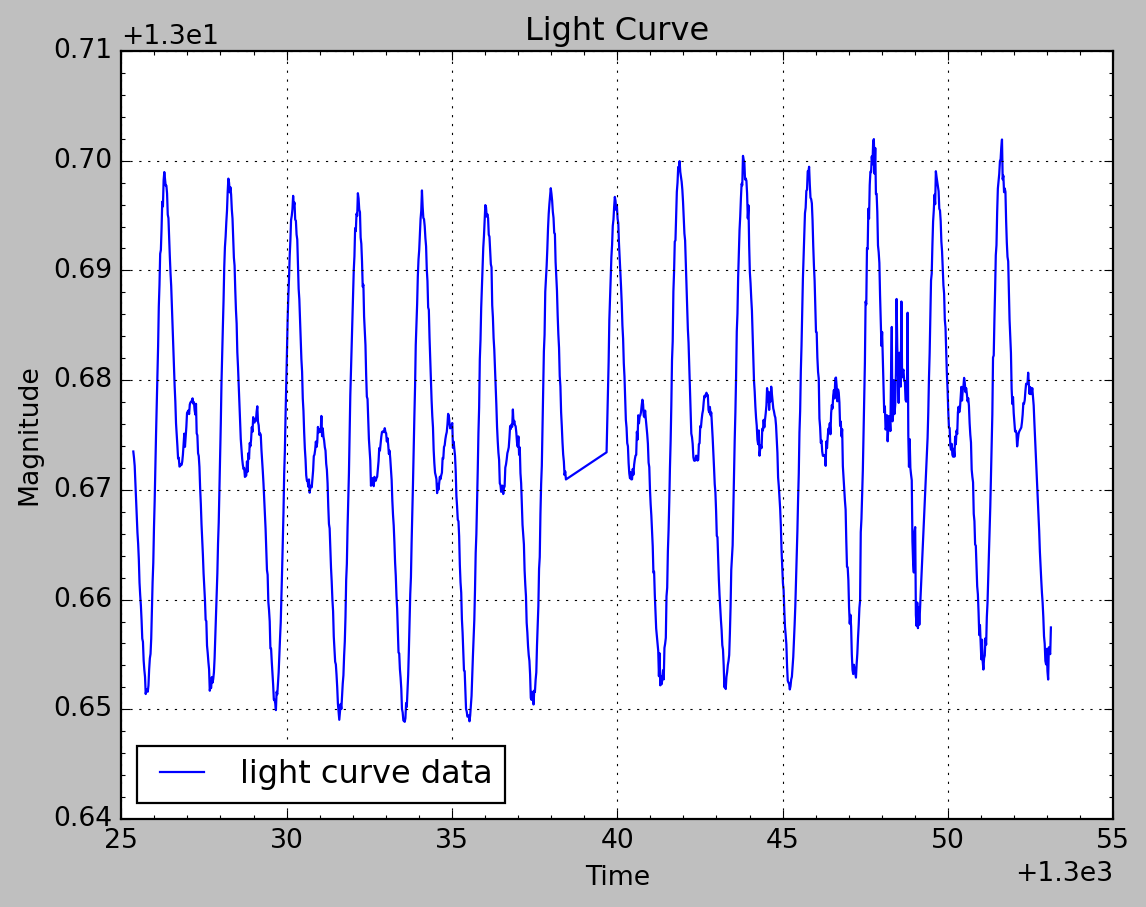

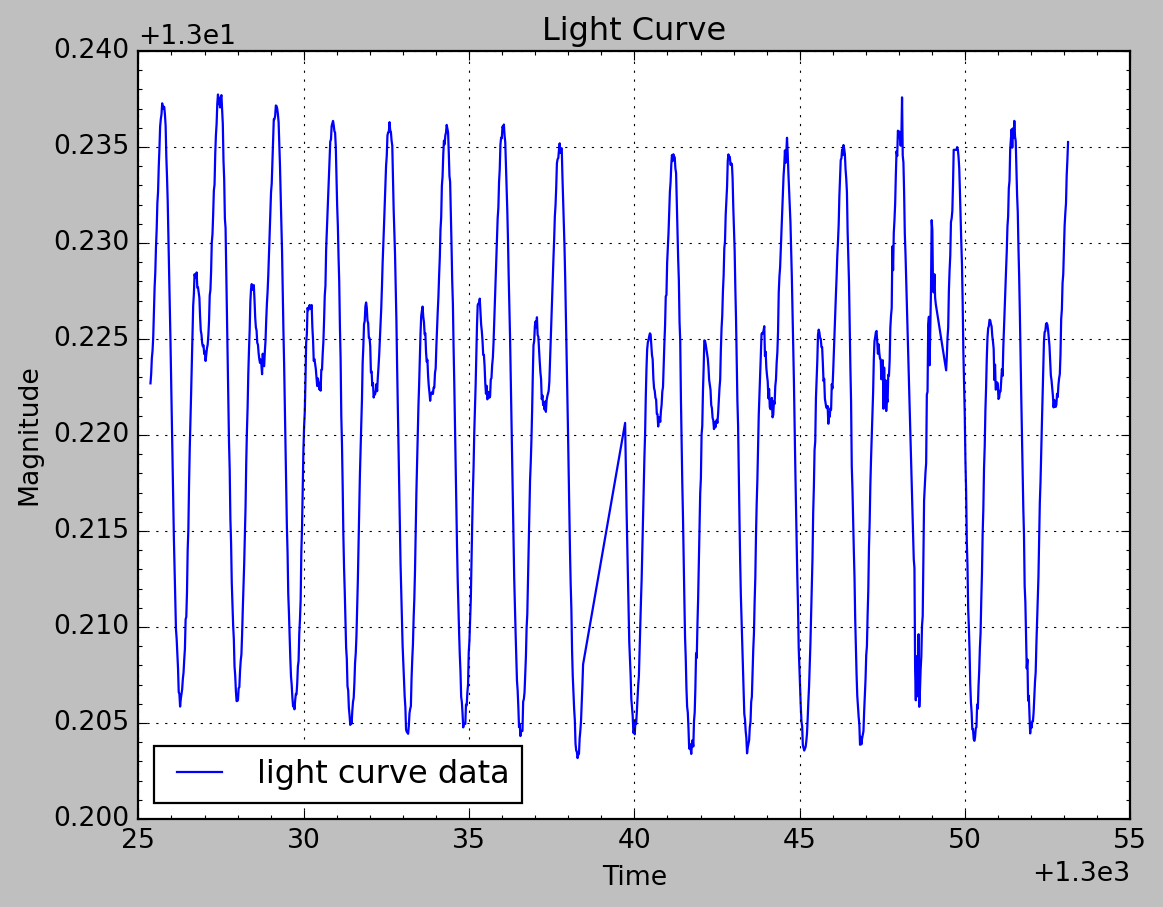

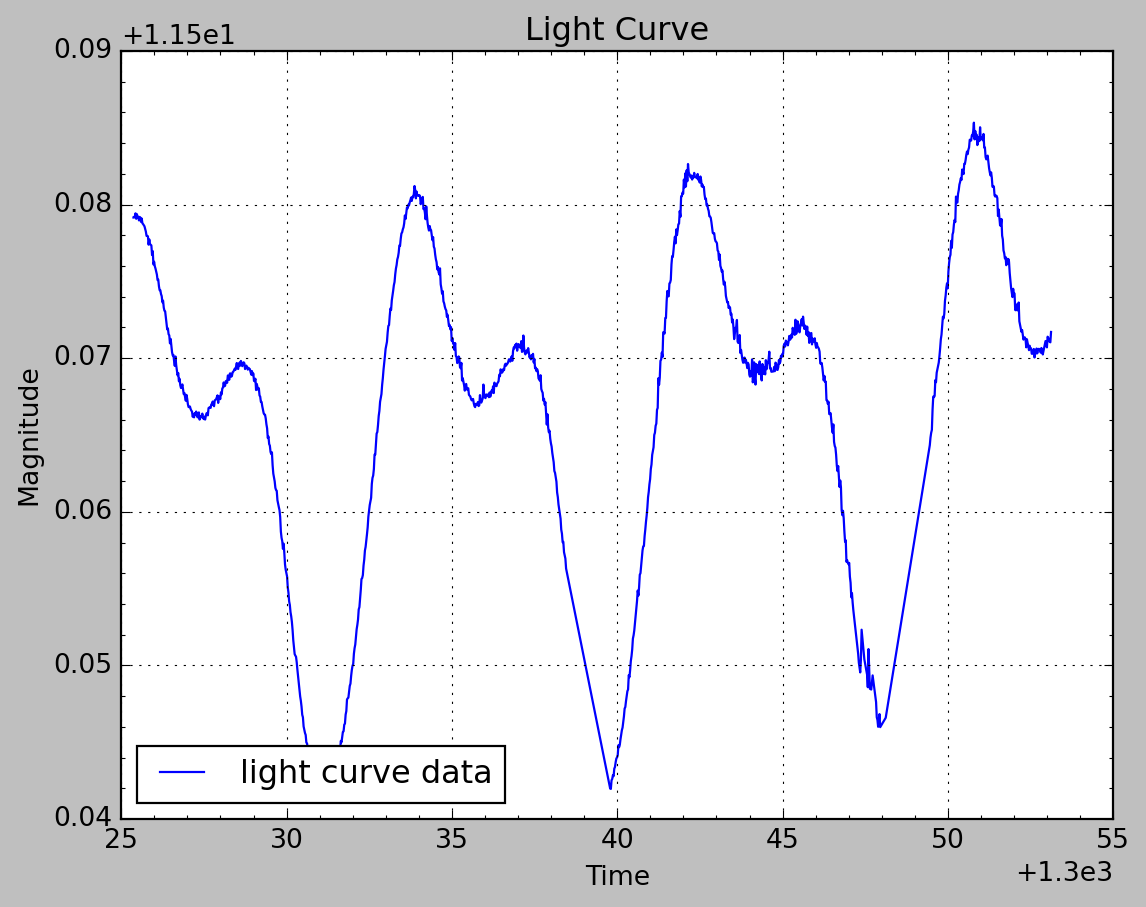

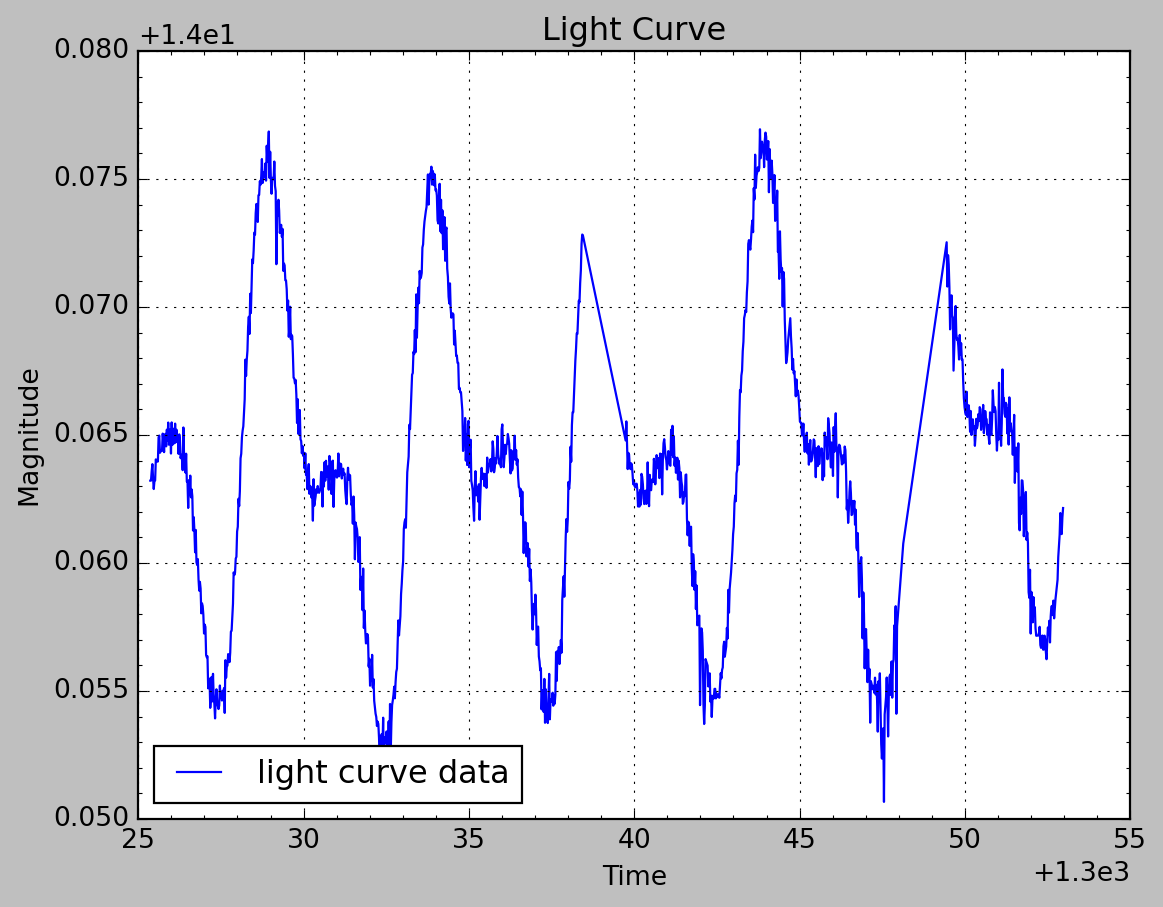

In [15]:
import matplotlib.pyplot as plt 
import pandas as pd
import os

# Function to plot a single light curve
def plot_light_curve(file_path):
    data_in = pd.read_csv(file_path, delim_whitespace=False, names=['time', 'mag', 'magerr'])
    tess_lc = data_in.to_records(index=False)
    plt.plot(tess_lc['time'], tess_lc['mag'], label='light curve data')
    plt.grid(which='major')
    plt.legend(loc='lower left')
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    plt.title('Light Curve')
    plt.minorticks_on()
    plt.tick_params(which='both', direction='in', tick2On=True)
    plt.savefig(os.path.splitext(file_path)[0] + '.pdf')  # Save plot as PDF
    plt.show()  # Close the plot to release memory

# Function to plot all light curves in a given folder
def plot_light_curves_in_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.lc'):  # Assuming the light curve files have .lc extension
                file_path = os.path.join(root, file)
                plot_light_curve(file_path)

# Example usage:
folder_path = '/home/user/DAA11/_TESS_lightcurves_outliercleaned/ACV/'
plot_light_curves_in_folder(folder_path)


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Function to plot a single light curve and save it as a PDF file
def plot_light_curve(file_path, output_dir):
    data_in = pd.read_csv(file_path, delim_whitespace=False,
                          names=['time', 'mag', 'magerr'])
    tess_lc = data_in.to_records(index=False)
    plt.figure()
    plt.plot(tess_lc['time'], tess_lc['mag'], label='Light curve data')
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    plt.title('Light curve')
    plt.grid(True)
    plt.legend(loc='lower left')
    file_name = os.path.basename(file_path).replace('.lc', '_light_curve.pdf')
    output_path = os.path.join(output_dir, file_name)
    plt.savefig(output_path)
    plt.close()

# Function to plot all light curves in all folders within a given directory
def plot_all_light_curves(root_folder, max_files=10):
    file_count = 0
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.lc'):  # Assuming the light curve files have .lc extension
                if file_count >= max_files:
                    return
                file_path = os.path.join(root, file)
                plot_light_curve(file_path, root_folder)
                file_count += 1

# Example usage:
root_folder = '/home/user/DAA11/_TESS_lightcurves_outliercleaned'
plot_all_light_curves(root_folder, max_files=10)


**Your tasks until next week:**

Modify the plotting code to plot three panels for each light curve: raw, median after CBV, outlier cleaned.

If you have more time, look up variable star types on the VSX website.

In [17]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
import glob

# Folder paths for the light curves
folder_path_raw = '/home/user/Downloads/DAA11/_TESS_lightcurves_raw/'
folder_path_median = '/home/user/Downloads/DAA11/_TESS_lightcurves_median_after_detrended/'
folder_path_outlier_cleaned = '/home/user/Downloads/DAA11/_TESS_lightcurves_outliercleaned/'

# List of all .lc files
lc_files = glob.glob(os.path.join(folder_path_raw, '*.lc'))

# Iterate over each .lc file
for lc_file in lc_files:
    # Read the raw light curve data
    data_raw = pd.read_csv(lc_file, delim_whitespace=False, names=['time', 'mag', 'magerr'])
    tess_lc_raw = data_raw.to_records(index=False)

    # Construct corresponding file paths for median and outlier-cleaned light curves
    file_name = os.path.basename(lc_file)
    lc_file_median = os.path.join(folder_path_median, file_name)
    lc_file_outlier_cleaned = os.path.join(folder_path_outlier_cleaned, file_name)

    # Read the median after CBV light curve data
    data_median = pd.read_csv(lc_file_median, delim_whitespace=False, names=['time', 'mag', 'magerr'])
    tess_lc_median = data_median.to_records(index=False)

    # Read the outlier cleaned light curve data
    data_outlier_cleaned = pd.read_csv(lc_file_outlier_cleaned, delim_whitespace=False, names=['time', 'mag', 'magerr'])
    tess_lc_outlier_cleaned = data_outlier_cleaned.to_records(index=False)

    # New figure and subplot
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

    # Raw light curve
    axes[0].plot(tess_lc_raw['time'], tess_lc_raw['mag'], label='Raw Light Curve')
    axes[0].set_title('Raw Light Curve')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Magnitude')
    axes[0].invert_yaxis()  # Invert the y-axis to match the convention of light curves
    axes[0].legend()

    # Median after CBV light curve
    axes[1].plot(tess_lc_median['time'], tess_lc_median['mag'], label='Median After CBV')
    axes[1].set_title('Median After CBV')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Magnitude')
    axes[1].invert_yaxis()  # Invert the y-axis to match the convention of light curves
    axes[1].legend()

    # Outlier cleaned light curve
    axes[2].plot(tess_lc_outlier_cleaned['time'], tess_lc_outlier_cleaned['mag'], label='Outlier Cleaned Light Curve')
    axes[2].set_title('Outlier Cleaned Light Curve')
    axes[2].set_xlabel('Time')
    axes[2].set_ylabel('Magnitude')
    axes[2].invert_yaxis()  # Invert the y-axis to match the convention of light curves
    axes[2].legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Save the plot as a PDF
    plot_file_name = file_name.replace('.lc', '_plot.pdf')
    plot_path = os.path.join(folder_path_raw, plot_file_name)
    plt.savefig(plot_path)

    # Close the figure to release memory
    plt.close(fig)


## Summary <a class="anchor" id="fourth-bullet"></a>

At this point, you should have:
* seen how to open tables (i.e.: light curves) in Python
* plotted light curves in Python using `matplotlib`
* removed `NaN` values from light curves.